## Imports

In [1]:
import numpy as np, pandas as pd
import pickle
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, classifiers, utils

### Load dataset

In [2]:
farseeing_df = farseeing.load()

41 subjects
Train set: X: (3418, 700), y: (3418,)        ([ADLs, Falls]) [3307  111]
Test set: X: (1222, 700), y: (1222,)        ([ADLs, Falls]) [1124   98]


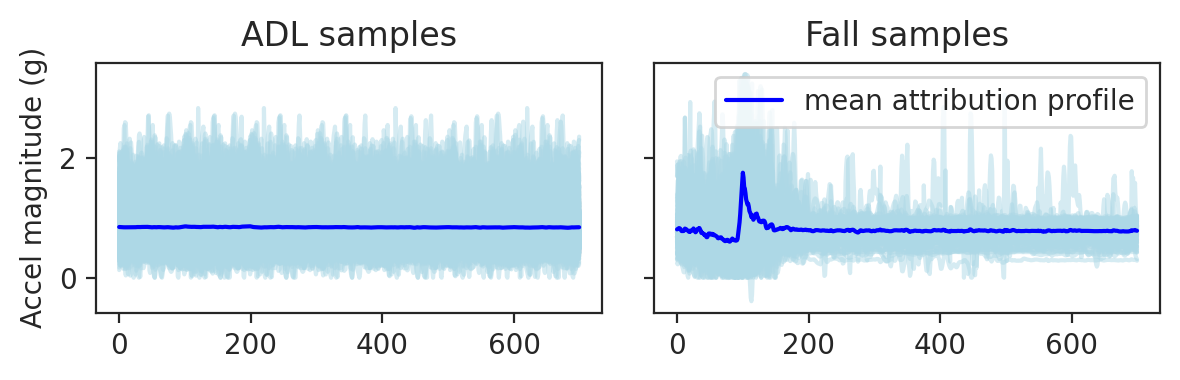

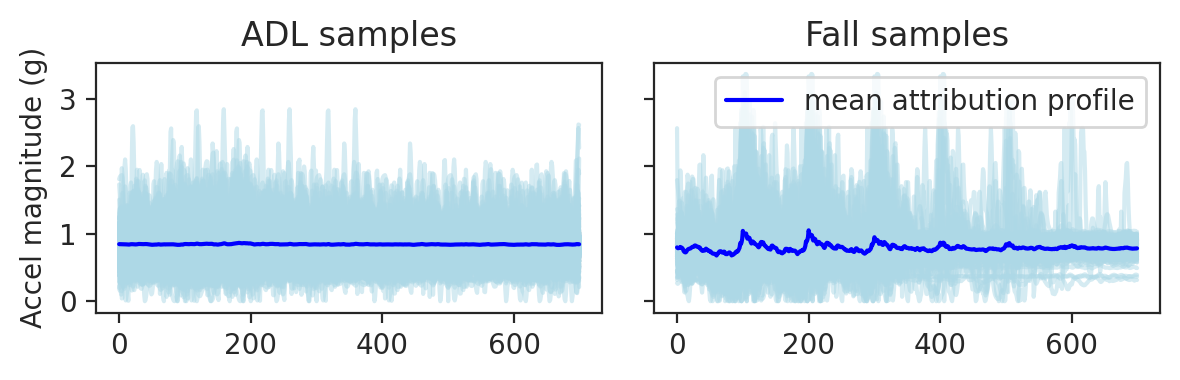

In [7]:
X_train, X_test, y_train, y_test = utils.train_test_subjects_split(
    farseeing, window_size=7, visualize=True, multiphase=True)
# utils.visualize_falls_adls(X_train, y_train, suptitle=title)

## Classification with Time Series Models

### FARSEEING Dataset

In [41]:
def cross_val(spacing, fall_pos):
	cv_df, aggr_df = classifiers.cross_validate(
		farseeing, df=farseeing_df, models_subset=['QUANT'],
		s=20, cv=2, spacing=spacing, fall_pos=fall_pos)
	return cv_df, aggr_df

cv_df = aggr_df = None
for spacing in [1,2,3,4,5,'na']:
	if cv_df is None:
		cv_df, aggr_df = cross_val(spacing, fall_pos='random')
		cv_df['spacing'] = spacing
	else:
		this_cv_df, this_aggr_df = cross_val(spacing, fall_pos='random')
		this_cv_df['spacing'] = spacing
		cv_df = pd.concat([cv_df, this_cv_df], ignore_index=True)



-- fold 1 (20 subjects) --
Train set: X: (2840, 2000), y: (2840,)            ([ADLs, Falls]) [1220 1620]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train set: X: (2915, 2000), y: (2915,)            ([ADLs, Falls]) [1615 1300]
Test set: X: (3629, 2000), y: (3629,)            ([ADLs, Falls]) [3309  320]
QUANT... 

-- fold 1 (20 subjects) --
Train set: X: (2030, 2000), y: (2030,)            ([ADLs, Falls]) [1220  810]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train set: X: (2265, 2000), y: (2265,)            ([ADLs, Falls]) [1615  650]
Test set: X: (3629, 2000), y: (3629,)            ([ADLs, Falls]) [3309  320]
QUANT... 

-- fold 1 (20 subjects) --
Train set: X: (1706, 2000), y: (1706,)            ([ADLs, Falls]) [1220  486]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train 

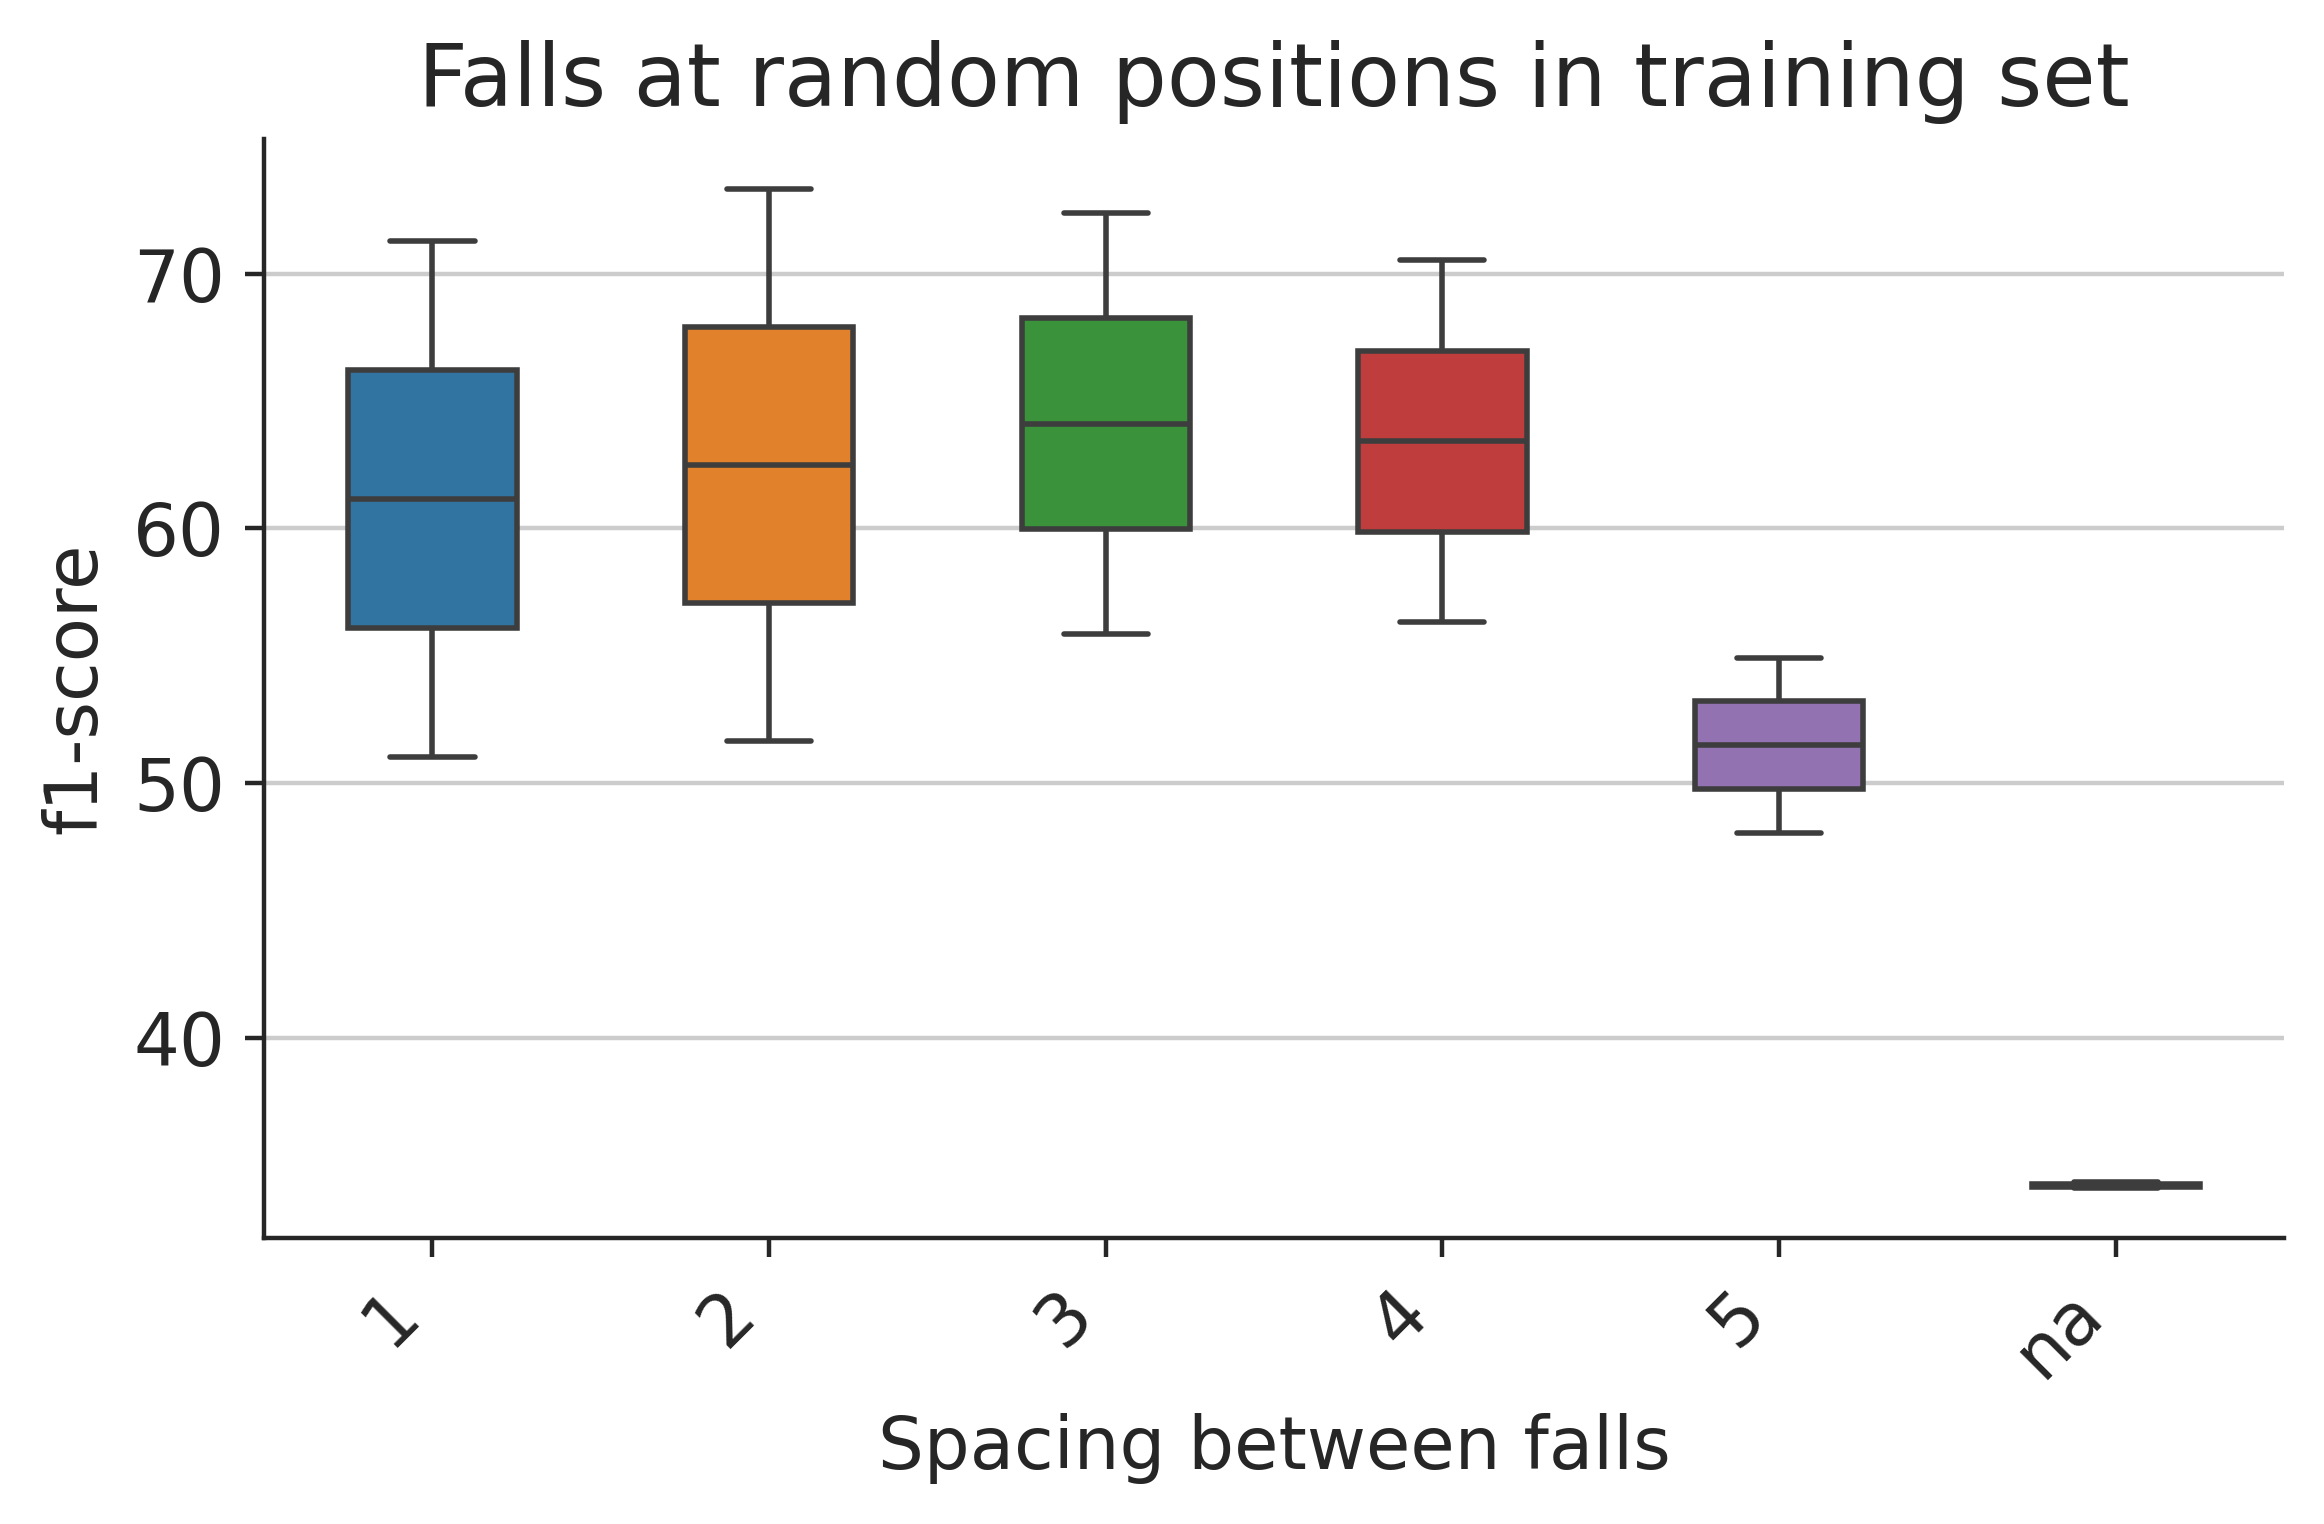

In [47]:
utils.summary_visualization(
    [cv_df], x='spacing', model_type='ts',
    title='Falls at random positions in training set',
    xlabel='Spacing between falls')

In [44]:
cv_df_fixed = aggr_df_fixed = None
for spacing in [1,2,3,4,5,'na']:
	if cv_df_fixed is None:
		cv_df_fixed, aggr_df_fixed = cross_val(spacing, fall_pos='fixed')
		cv_df_fixed['spacing'] = spacing
	else:
		this_cv_df, this_aggr_df = cross_val(spacing, fall_pos='fixed')
		this_cv_df['spacing'] = spacing
		cv_df_fixed = pd.concat([cv_df_fixed, this_cv_df], ignore_index=True)



-- fold 1 (20 subjects) --
Train set: X: (2516, 2000), y: (2516,)            ([ADLs, Falls]) [1220 1296]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train set: X: (2655, 2000), y: (2655,)            ([ADLs, Falls]) [1615 1040]
Test set: X: (3629, 2000), y: (3629,)            ([ADLs, Falls]) [3309  320]
QUANT... 

-- fold 1 (20 subjects) --
Train set: X: (1869, 2000), y: (1869,)            ([ADLs, Falls]) [1221  648]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train set: X: (2135, 2000), y: (2135,)            ([ADLs, Falls]) [1615  520]
Test set: X: (3629, 2000), y: (3629,)            ([ADLs, Falls]) [3309  320]
QUANT... 

-- fold 1 (20 subjects) --
Train set: X: (1706, 2000), y: (1706,)            ([ADLs, Falls]) [1220  486]
Test set: X: (4294, 2000), y: (4294,)            ([ADLs, Falls]) [4038  256]
QUANT... 

-- fold 2 (20 subjects) --
Train 

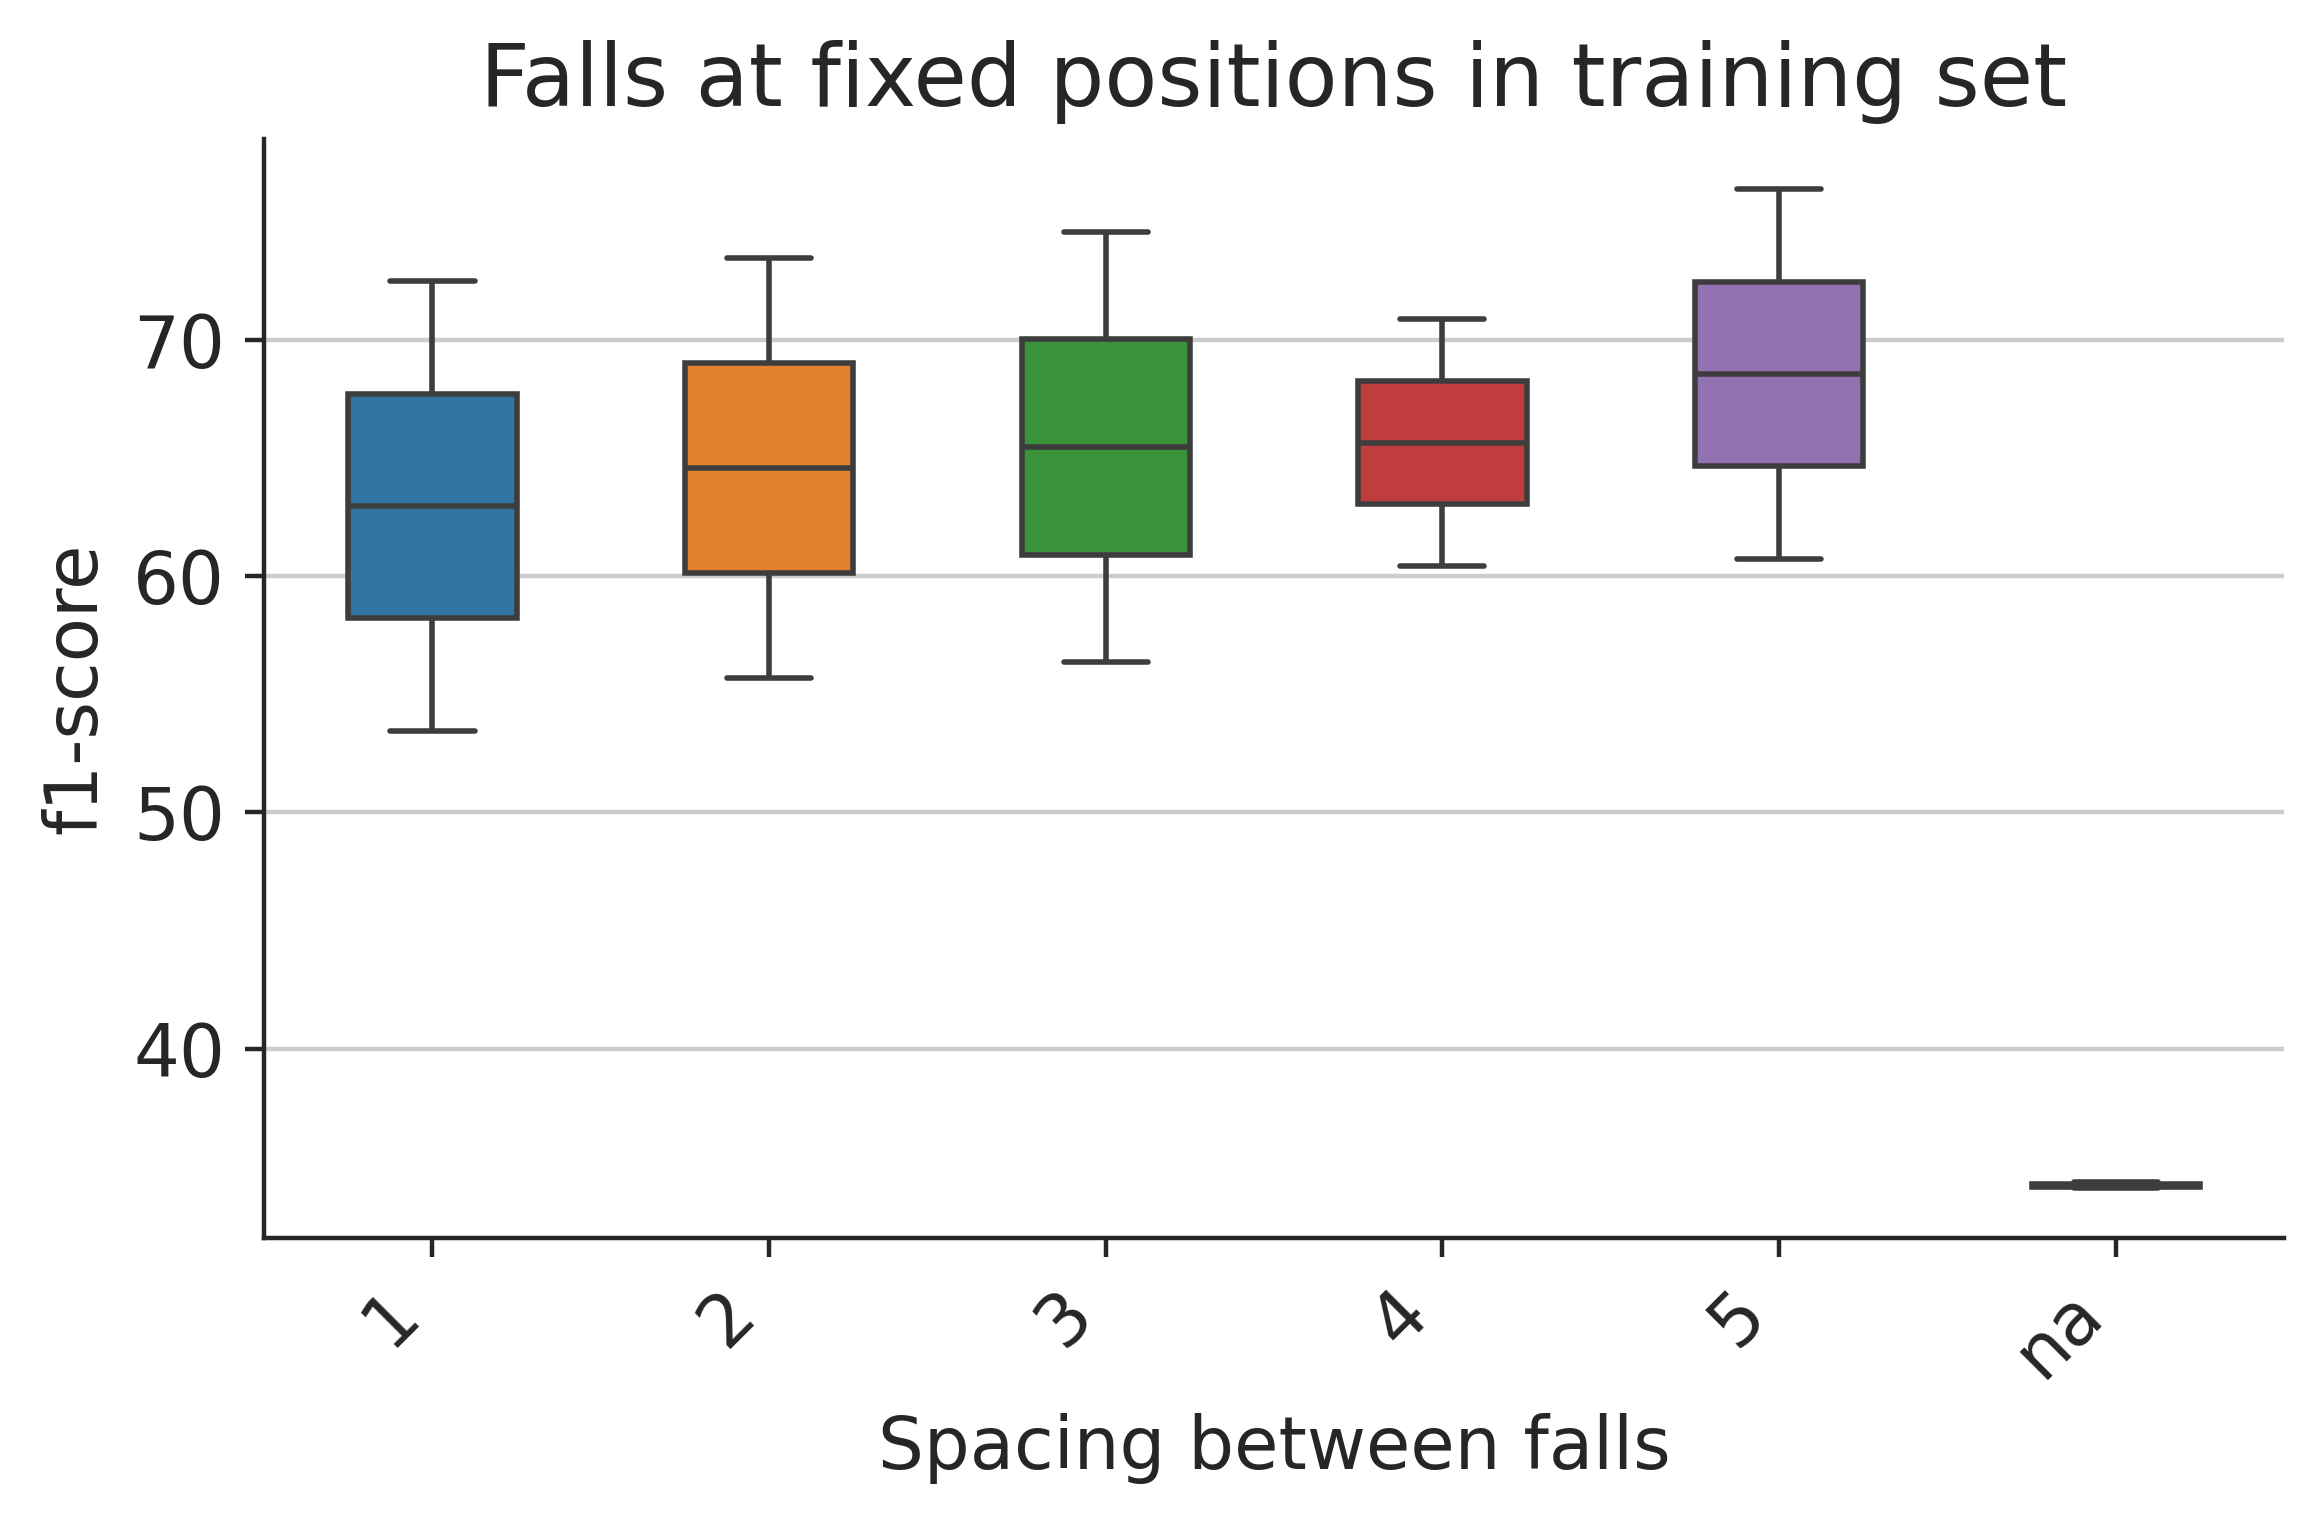

In [48]:
utils.summary_visualization(
    [cv_df_fixed], x='spacing', model_type='ts',
    title='Falls at fixed positions in training set',
    xlabel='Spacing between falls')

### Effect of Window Size

In [22]:
def run(s):
	X_train, X_test, y_train, y_test = utils.train_test_subjects_split(farseeing, window_size=s)
	ts_metrics, _ = classifiers.run_models(
		X_train, y_train, X_test, y_test,
          s=s, subset=['QUANT'], freq=100)
	return ts_metrics

ts_window_metrics = None
for s in range(15, 21):
    print(f'\n<--- Window size: {s} seconds --->')
    if ts_window_metrics is None:
        ts_window_metrics = run(s)
    else:
        new_metrics_df = run(s)
        ts_window_metrics = pd.concat([ts_window_metrics, new_metrics_df],
                                      ignore_index=True)


<--- Window size: 15 seconds --->
41 subjects
Train set: X: (2330, 1500), y: (2330,)        ([ADLs, Falls]) [1997  333]
Test set: X: (1419, 1500), y: (1419,)        ([ADLs, Falls]) [1317  102]
QUANT... 
<--- Window size: 16 seconds --->
41 subjects
Train set: X: (2391, 1600), y: (2391,)        ([ADLs, Falls]) [2058  333]
Test set: X: (1461, 1600), y: (1461,)        ([ADLs, Falls]) [1326  135]
QUANT... 
<--- Window size: 17 seconds --->
41 subjects
Train set: X: (2440, 1700), y: (2440,)        ([ADLs, Falls]) [2107  333]
Test set: X: (1510, 1700), y: (1510,)        ([ADLs, Falls]) [1374  136]
QUANT... 
<--- Window size: 18 seconds --->
41 subjects
Train set: X: (2484, 1800), y: (2484,)        ([ADLs, Falls]) [2151  333]
Test set: X: (1558, 1800), y: (1558,)        ([ADLs, Falls]) [1422  136]
QUANT... 
<--- Window size: 19 seconds --->
41 subjects
Train set: X: (2481, 1900), y: (2481,)        ([ADLs, Falls]) [2148  333]
Test set: X: (1607, 1900), y: (1607,)        ([ADLs, Falls]) [1471 

In [25]:
ts_window_metrics.to_csv('results/quant15_20_window_size_ablation.csv')

In [23]:
ts_window_metrics

,model,window_size,runtime,auc,precision,recall,specificity,f1-score
0,QUANT,15,1616.0,97.0,74.44,65.69,98.25,69.79
1,QUANT,16,1624.0,97.0,84.00,62.22,98.79,71.49
2,QUANT,17,1689.0,97.0,79.38,56.62,98.54,66.09
3,QUANT,18,1664.0,98.0,80.61,58.09,98.66,67.52
4,QUANT,19,1690.0,98.0,81.90,63.24,98.71,71.37
5,QUANT,20,1724.0,97.0,70.67,77.94,97.10,74.13


In [177]:
ave_from_winsizes =ts_window_metrics.drop(columns=['model']).groupby(['window_size']).mean()

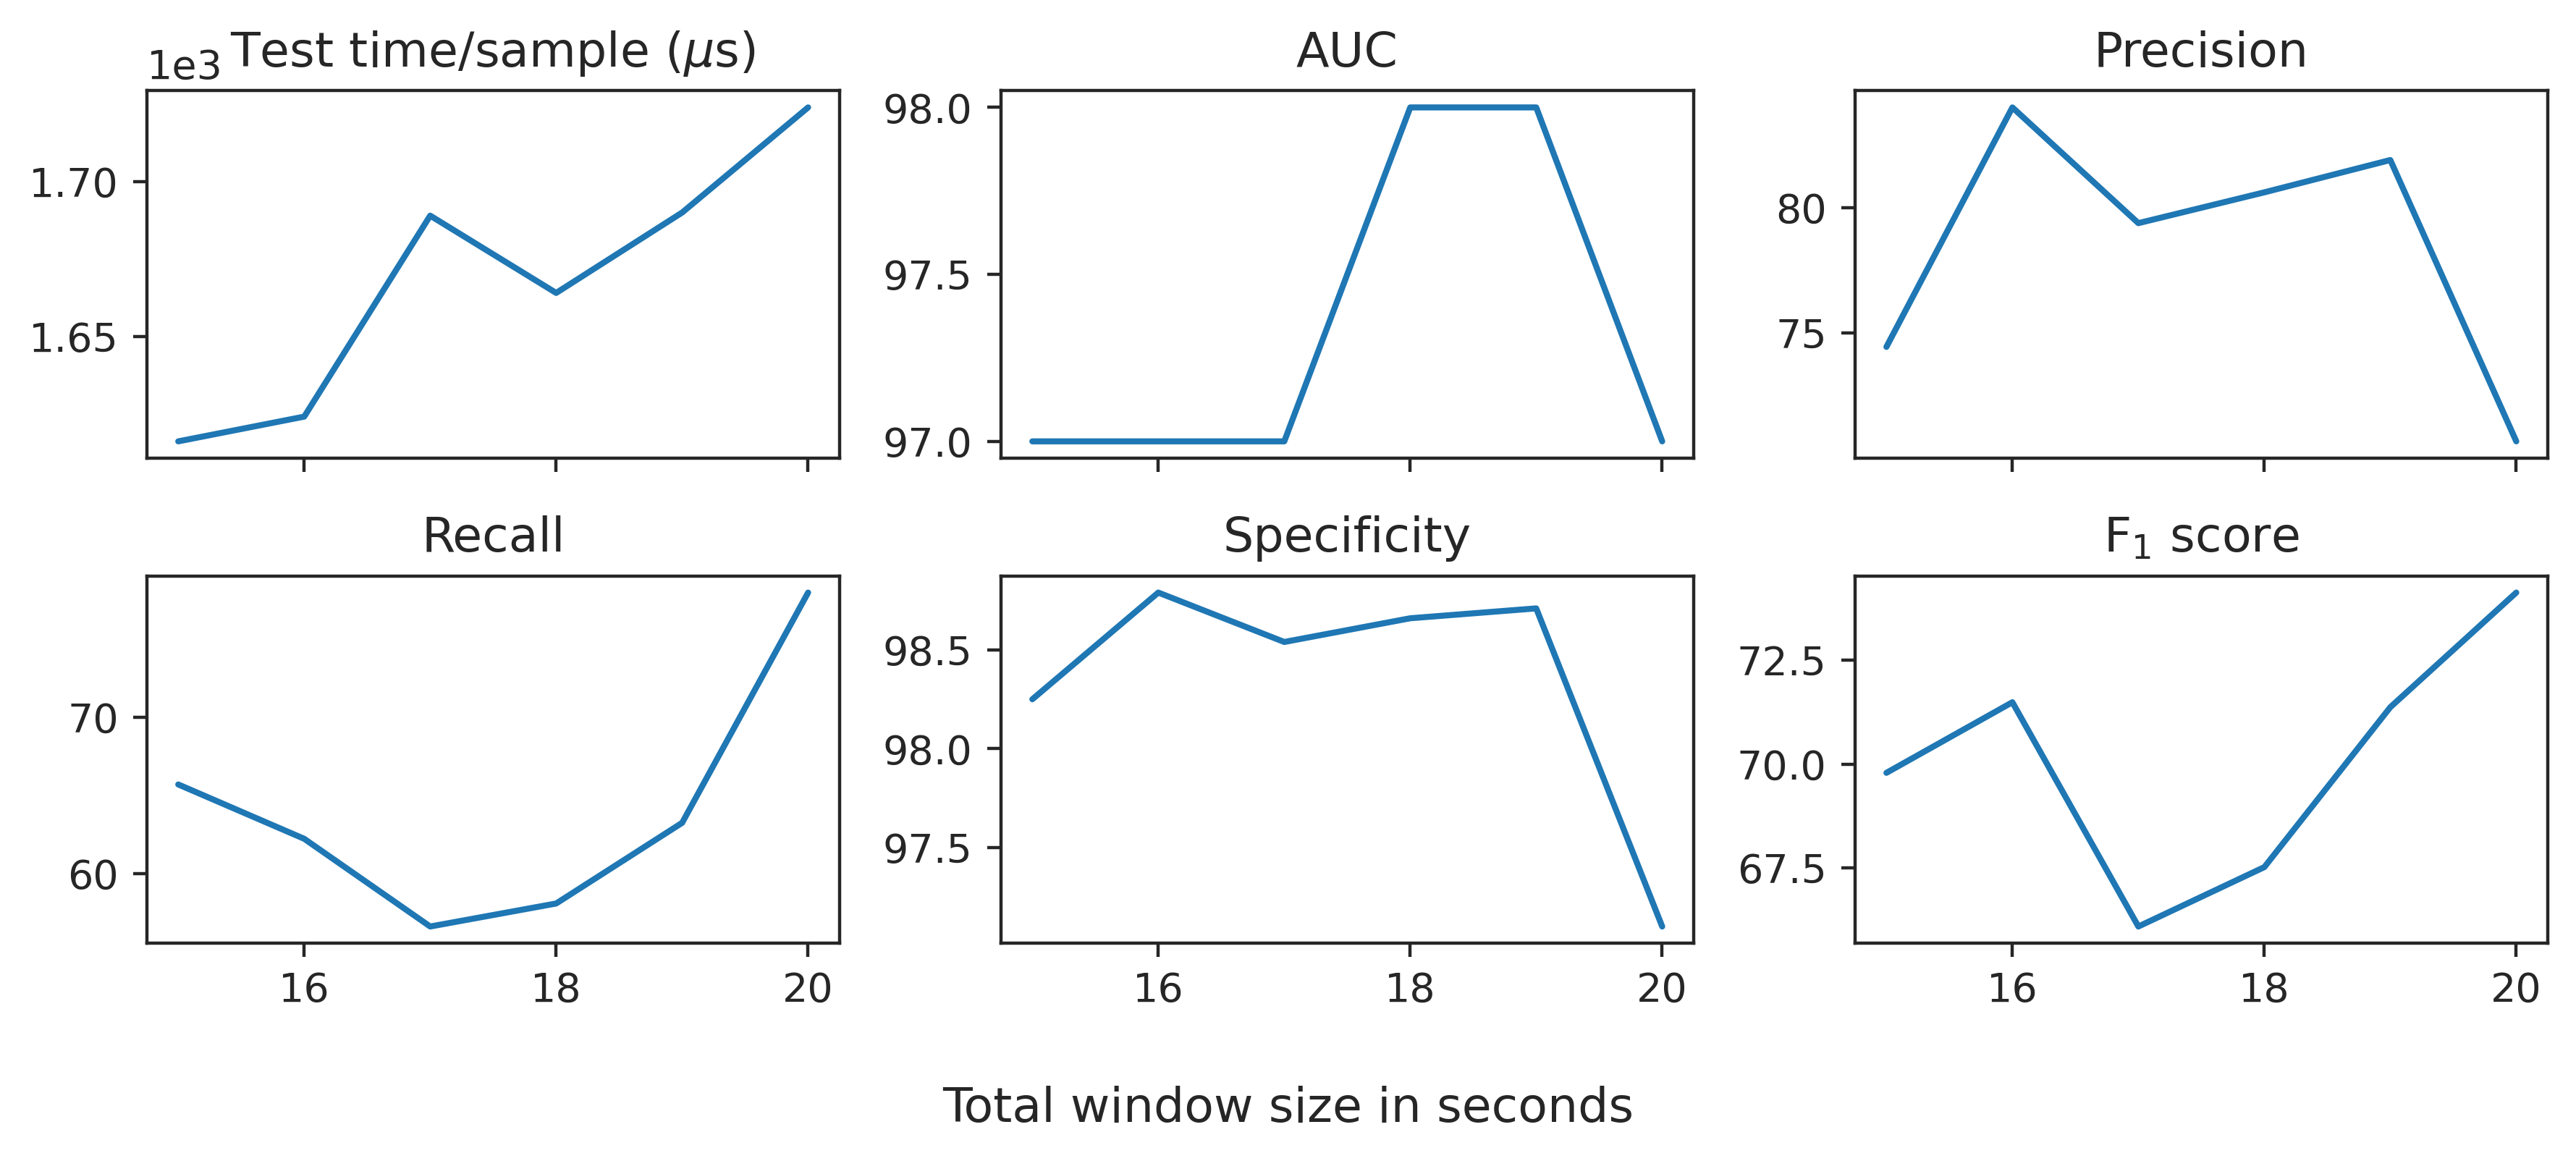

In [24]:
utils.plot_window_size_ablation(ts_window_metrics)

### Try larger window sizes

In [26]:
def run(s):
	X_train, X_test, y_train, y_test = utils.train_test_subjects_split(farseeing, window_size=s)
	ts_metrics, _ = classifiers.run_models(
		X_train, y_train, X_test, y_test,
		s=s, subset=['QUANT'], freq=100)
	return ts_metrics

ts_window_metrics = None
for s in [20, 30, 40, 50, 60]:
    print(f'\n<--- Window size: {s} seconds --->')
    if ts_window_metrics is None:
        ts_window_metrics = run(s)
    else:
        new_metrics_df = run(s)
        ts_window_metrics = pd.concat([ts_window_metrics, new_metrics_df],
                                      ignore_index=True)


<--- Window size: 20 seconds --->
41 subjects
Train set: X: (2582, 2000), y: (2582,)        ([ADLs, Falls]) [2138  444]
Test set: X: (1651, 2000), y: (1651,)        ([ADLs, Falls]) [1515  136]
QUANT... 
<--- Window size: 30 seconds --->
41 subjects
Train set: X: (2984, 3000), y: (2984,)        ([ADLs, Falls]) [2318  666]
Test set: X: (2024, 3000), y: (2024,)        ([ADLs, Falls]) [1820  204]
QUANT... 
<--- Window size: 40 seconds --->
41 subjects
Train set: X: (3312, 4000), y: (3312,)        ([ADLs, Falls]) [2424  888]
Test set: X: (2327, 4000), y: (2327,)        ([ADLs, Falls]) [2055  272]
QUANT... 
<--- Window size: 50 seconds --->
41 subjects
Train set: X: (3602, 5000), y: (3602,)        ([ADLs, Falls]) [2492 1110]
Test set: X: (2577, 5000), y: (2577,)        ([ADLs, Falls]) [2237  340]
QUANT... 
<--- Window size: 60 seconds --->
41 subjects
Train set: X: (3848, 6000), y: (3848,)        ([ADLs, Falls]) [2516 1332]
Test set: X: (2787, 6000), y: (2787,)        ([ADLs, Falls]) [2379 

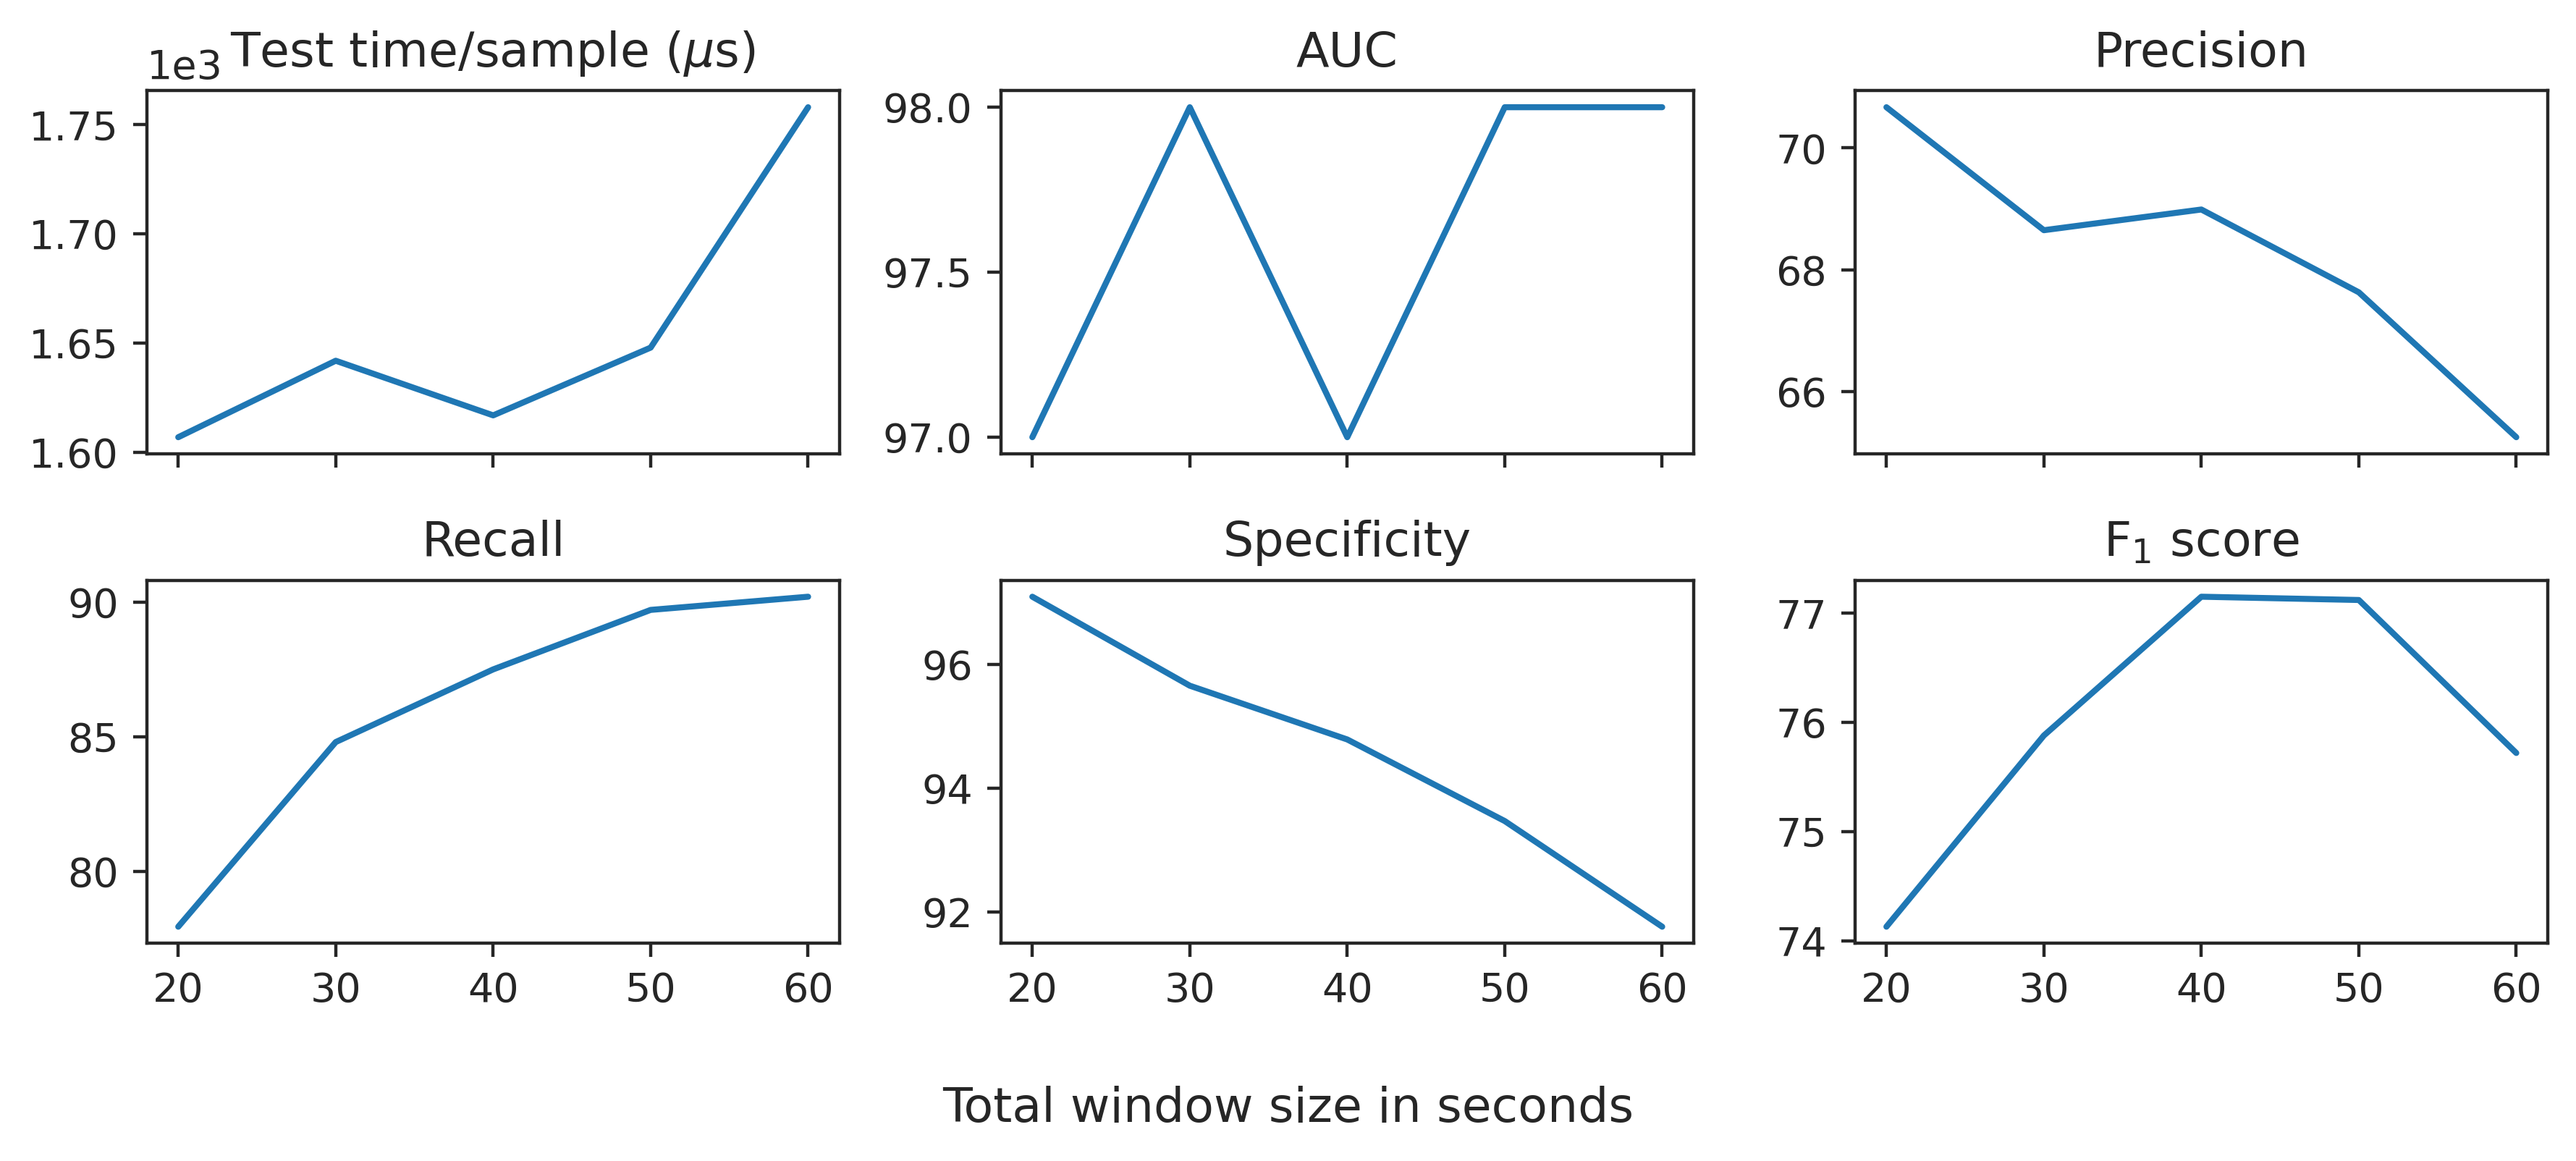

In [27]:
utils.plot_window_size_ablation(ts_window_metrics)